<a href="https://colab.research.google.com/github/akanksha0911/DeepLearning_7/blob/main/AkankshaRawat_RNN_AM7_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. RNN- One-to-many**


One-to-many sequence problems are sequence problems where the input data has one time-step, and the output contains a vector of multiple values or multiple time-steps. Thus, we have a single input and a sequence of outputs.
A typical example is image captioning, where the description of an image is generated.

In [4]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

**Creating the Dataset**

In [1]:
X = list()
Y = list()
X = [x+3 for x in range(-2, 43, 3)]

for i in X:
    output_vector = list()
    output_vector.append(i+1)
    output_vector.append(i+2)
    Y.append(output_vector)

print(X)
print(Y)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
[[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


Our input contains 15 samples with one time-step and one feature value. For each value in the input sample, the corresponding output vector contains the next two integers. For instance, if the input is 4, the output vector will contain values 5 and 6. Hence, the problem is a simple one-to-many sequence problem.

The following script reshapes our data as required by the LSTM:

In [5]:
X = np.array(X).reshape(15, 1, 1)
Y = np.array(Y)

Solution via Simple LSTM

In [6]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=3)


Epoch 1/1000
4/4 [==============================] - 3s 73ms/step - loss: 447.5462 - val_loss: 1632.8048
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 438.2929 - val_loss: 1602.0114
Epoch 3/1000
4/4 [==============================] - 0s 8ms/step - loss: 429.7032 - val_loss: 1570.7174
Epoch 4/1000
4/4 [==============================] - 0s 8ms/step - loss: 421.1010 - val_loss: 1537.3418
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 410.9883 - val_loss: 1503.0049
Epoch 6/1000
4/4 [==============================] - 0s 8ms/step - loss: 402.3784 - val_loss: 1465.3539
Epoch 7/1000
4/4 [==============================] - 0s 9ms/step - loss: 391.1396 - val_loss: 1426.4082
Epoch 8/1000
4/4 [==============================] - 0s 8ms/step - loss: 380.1814 - val_loss: 1384.7383
Epoch 9/1000
4/4 [==============================] - 0s 8ms/step - loss: 369.2033 - val_loss: 1340.0092
Epoch 10/1000
4/4 [==============================] - 0s 9ms/step - loss

Once the model is trained we can make predictions on the test data:

In [7]:
test_input = array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[11.069507 12.115809]]


The test data contains a value 10. In the output, we should get a vector containing 11 and 12. The output I received is [11.047798 12.01309 ] which is actually very close to the expected output.

# **2. RNN - One-to-one**

> In this section, we will see how to solve one-to-one sequence problem where each time-step has a single feature.

In [8]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

**Creating the Dataset**

In this next step, we will prepare the dataset that we are going to use for this section.

In the script above, we create 20 inputs and 20 outputs. Each input consists of one time-step, which in turn contains a single feature. Each output value is 15 times the corresponding input value. If you run the above script, you should see the input and output values as shown below:

In [9]:
X = list()
Y = list()
X = [x+1 for x in range(20)]
Y = [y * 15 for y in X]

print(X)
print(Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]


The input to LSTM layer should be in 3D shape i.e. (samples, time-steps, features). The samples are the number of samples in the input data. We have 20 samples in the input. The time-steps is the number of time-steps per sample. We have 1 time-step. Finally, features correspond to the number of features per time-step. We have one feature per time-step.

We can reshape our data via the following command:

In [10]:
X = np.array(X).reshape(20, 1, 1)
Y = np.array(Y)

**Solution via Simple LSTM**

Now we can create our simple LSTM model with one LSTM layer.



In [11]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


In the script above, we create an LSTM model with one LSTM layer of 50 neurons and relu activation functions. You can see the input shape is (1,1) since our data has one time-step with one feature. Executing the above script prints the following summary:

Let's now train our model:

In [12]:
model.fit(X, Y, epochs=2000, validation_split=0.2, batch_size=5)

Epoch 1/2000
4/4 [==============================] - 1s 105ms/step - loss: 20984.3379 - val_loss: 76944.0312
Epoch 2/2000
4/4 [==============================] - 0s 9ms/step - loss: 20952.6406 - val_loss: 76815.7344
Epoch 3/2000
4/4 [==============================] - 0s 9ms/step - loss: 20913.6016 - val_loss: 76696.1797
Epoch 4/2000
4/4 [==============================] - 0s 9ms/step - loss: 20886.2441 - val_loss: 76566.0391
Epoch 5/2000
4/4 [==============================] - 0s 9ms/step - loss: 20848.8301 - val_loss: 76438.7812
Epoch 6/2000
4/4 [==============================] - 0s 9ms/step - loss: 20814.1426 - val_loss: 76305.0078
Epoch 7/2000
4/4 [==============================] - 0s 9ms/step - loss: 20777.4355 - val_loss: 76163.1562
Epoch 8/2000
4/4 [==============================] - 0s 10ms/step - loss: 20735.8203 - val_loss: 76021.9922
Epoch 9/2000
4/4 [==============================] - 0s 9ms/step - loss: 20701.4199 - val_loss: 75861.6719
Epoch 10/2000
4/4 [========================

We train our model for 2000 epochs with a batch size of 5. You can choose any number. Once the model is trained, we can make predictions on a new instance.

Let's say we want to predict the output for an input of 30. The actual output should be 30 x 15 = 450. Let's see what value do we get. First, we need to convert our test data to the right shape i.e. 3D shape, as expected by LSTM. The following script predicts the output for the number 30:

In [13]:
test_input = array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[445.11365]]


# **3. RNN - Many-to-one**
> In this post, We will briefly cover the many-to-one type, which is one the common types of Recurrent Neural Network and its implementation in tensorflow. 


https://colab.research.google.com/github/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-12-06-01-RNN-Many-to-one.ipynb

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print('Tensorflow: {}'.format(tf.__version__))

plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)

Tensorflow: 2.8.0


## Various usage of RNN
As we already discussed, RNN is used for sequence data handling. And there are several types of RNN architecture.

![various_rnn](image/various_rnn.png) {% fn 1 %}

In previous [post](https://goodboychan.github.io/chans_jupyter/python/deep_learning/tensorflow-keras/2020/10/26/02-RNN-Basic.html), we take a look **one-to-one** type, which is the basic RNN structure. And next one is **one-to-many** type. For example, if the model gets the fixed format like image as an input, it generates the sequence data. You can see the implementation on image caption application. Another type is **many-to-many** type. It gets sequence data as an inputs, and also generates the sequence data as an output. Common application of many-to-many type is machine translation.

## Many-to-one

**Many-to-one** type, which is our topic in this post, gets an sequence data as an input and generates some informatic data like labels. So we can use it for classification. Suppose that someone defines the sentiment of each sentence, and train the model with many-to-one type. And when the model gets the unseen sentence, then it will predict the intention of sentence, good or bad.

![many-to-one example](image/many-to-one.png)

The detailed explanation is like this.

Suppose we have a sentence, "This movis is good". And we want to classify the sentiment of this sentence. In order to do this, we need to apply tokenization in word level. If this sentensce intends the good sentiment, then word token may contains good words, like "good". So we can classify this sentense to good sentiment.

So if we want to apply it in RNN model, we need to consider the sentence as a word sequence(many), then clssify its label(one). That is process of many-to-one type model.

![many-to-one detail](image/many-to-one_detail.png)

But as you notice, computational model cannot accept the word itself as an input. Instead, it needs to convert with numerical vector. **Embedding** Layer can do this.

So how can we implement this with tensorflow?

## Example - Word sentiment classification

At first, we prepare the dummy data for simple classification. For the simplicity, we defined 1 as a good token, and 0 otherwise.

In [ ]:
words = ['good', 'bad', 'worse', 'so good']
y = [1, 0, 0, 1]

Based on this, we can generate the token dictionary, which is the mapping table for each characters. But before we prepare this, we need to consider one exceptional case, the variation of each sentence length. To train the network, the format (or shape) of input data must be fixed. So we need to add the concept of **padding**. Tensorflow has useful API for padding, `pad_sequences`.

In [ ]:
char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx:char for idx, char in enumerate(char_set)}
char2idx = {char:idx for idx, char in enumerate(char_set)}

In [ ]:
char_set

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']

In [ ]:
idx2char

{0: '<pad>',
 1: ' ',
 2: 'a',
 3: 'b',
 4: 'd',
 5: 'e',
 6: 'g',
 7: 'o',
 8: 'r',
 9: 's',
 10: 'w'}

In [ ]:
char2idx

{' ': 1,
 '<pad>': 0,
 'a': 2,
 'b': 3,
 'd': 4,
 'e': 5,
 'g': 6,
 'o': 7,
 'r': 8,
 's': 9,
 'w': 10}

So as we mentioned before, we need to vectorize each tokens.

In [ ]:
X = list(map(lambda word: [char2idx.get(char) for char in word], words))
X_len = list(map(lambda word: len(word), X))

In [ ]:
X

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]

In [ ]:
X_len

[4, 3, 5, 7]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding the sequence of indices
max_sequence=10

X = pad_sequences(X, maxlen=max_sequence, padding='post', truncating='post')

In [ ]:
X

array([[ 6,  7,  7,  4,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  4,  0,  0,  0,  0,  0,  0,  0],
       [10,  7,  8,  9,  5,  0,  0,  0,  0,  0],
       [ 9,  7,  1,  6,  7,  7,  4,  0,  0,  0]], dtype=int32)

In [ ]:
y

[1, 0, 0, 1]

Here, we used `pad_sequences` API with several arguments. First, we defined maximum sequence length to 10. So numerical vector has an maximum length of 10. That is, we just consider 10 characters for sequence. And there are some words that has less than 10 characters. In that case, we filled some 0s for padding. Through argument, we can define the direction of padding, `pre` or `post`.

And of course, it is efficient to use the dataset with generator.

In [ ]:
# Generate data pipeline
train_ds = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(buffer_size=4).batch(batch_size=2)
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 10), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


After that, we can build many-to-one model with simpleRNN.

In [ ]:
input_dim = len(char2idx)
output_dim = len(char2idx)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim,
              mask_zero=True, input_length=max_sequence,
              trainable=False, embeddings_initializer=tf.keras.initializers.random_normal()),
    SimpleRNN(units=10),
    Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 11)            121       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [ ]:
def loss_fn(model, X, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true=y, 
                                                                          y_pred=model(X), 
                                                                          from_logits=True))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
tr_loss_hist = []

for e in range(30):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in train_ds:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x_mb, y_mb)
            
        grads = tape.gradient(tr_loss, sources=model.variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    
    avg_tr_loss /= tr_step
    tr_loss_hist.append(avg_tr_loss)
    
    if (e + 1) % 5 == 0:
        print('epoch: {:3}, tr_loss: {:3f}'.format(e + 1, avg_tr_loss))

epoch:   5, tr_loss: 0.071402
epoch:  10, tr_loss: 0.004197
epoch:  15, tr_loss: 0.001211
epoch:  20, tr_loss: 0.000727
epoch:  25, tr_loss: 0.000566
epoch:  30, tr_loss: 0.000487


After that, we can check the performance of this simple rnn network

In [ ]:
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
print('acc: {:.2%}'.format(np.mean(y_pred == y)))

acc: 100.00%


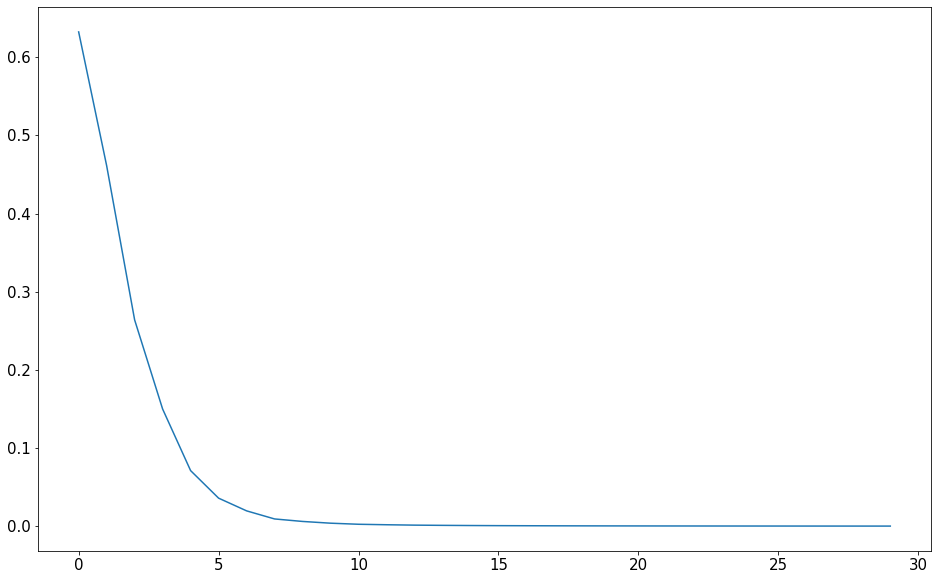

In [ ]:
plt.figure()
plt.plot(tr_loss_hist)
plt.show()

As you can see, the performance of this simple network shows almost 100% accuracy.

## Summary

In this post, we just cover the basic concept of **many-to-one** type RNN model for sentiment classification, and implement it with Tensorflow.

{{ 'Reference from stanford CS231n lecture note' | fndetail: 1 }}

# **4. RNN - Many-to-many**
> In this coalb, We will cover the many-to-many RNN model, which can be used for Part of Speech (POS) tagging and Named Entity Recognition (NER).
    Ref: https://goodboychan.github.io/python/deep_learning/tensorflow-keras/2020/12/09/01-RNN-Many-to-many.html

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print('Tensorflow: {}'.format(tf.__version__))

plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)

Tensorflow: 2.8.0


## What is "Many-to-many"?

Previously, we covered 3 kinds of RNN model, one-to-one, many-to-one, and many-to-one with stacked model. Especially on many-to-one model, it gets an sequence data as an input, and generates the single output. So it can be used for classification, and previous example shows simple implementation of many-to-one model for word/sequence classification.

Then, what is **many-to-many** model?

The concept is same as before. In many-to-one model, to generate the output, the final input must be entered into model. Unlike this, many-to-many model generates the output whenever each input is read. That is, many-to-many model can understand the feature of each token in input sequence.

One possible example is [**Part-of-Speech**](https://en.wikipedia.org/wiki/Part_of_speech) tagging, POS for short. POS is a category of words (or lexical items) that have similar grammatical properties. Common POS type are noun, verb, adjective, adverb, pronoun, etc. {% fn 2 %}. So POS tagging is automatically tagged POS of each token. Of course, it can manually handle with rule-based model, but many-to-many model is appropriate for doing this.

For example, we have a sentence.
$$ \text{tensorflow is very easy} $$

In order to do POS tagging, word tokenization is processed on that sentence. After that, we can get

$$ [\text{'tensorflow', 'is', 'very', 'easy'}] $$

Then POS will be tagged on each token like this,

$$[\text{'noun', 'verb', 'adverb', 'adjective'}]$$

If the many-to-many model is well-trained, whole process will be happened well.

Unlike many-to-one model, loss measure is also different in many-to-many model. In many-to-one model, it can measure the loss by comparing the prediction value($\hat{y}$) and actual value($y$). But in many-to-many model, each output node can measure the loss. There are many losses, so common ways to use it for training is by averaging whole losses. This kind of loss is called **sequence loss**. After that, specific optimizer (SGD or Adam) tries to minimize the loss with backpropagation.

One thing we need to consider is handling padding tokens('<pad>'). As you saw from previous post, padding tokens are for formalize the various length of each sentence, it has no meaning. So it is required to remove (or "masking") padding tokens before training.

## Example - Part of Speech Tagging

### Prepraring Dataset

In this section, we will implement the simple many-to-many model for POS tagging. Of course, there are two types of training data, sentence, and POS of that sentence. (Assume that we already tokenize each sentence.)

In [ ]:
sentences = [['I', 'feel', 'hungry'],
             ['tensorflow', 'is', 'very', 'difficult'],
             ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
             ['tensorflow', 'is', 'very', 'fast', 'changing']]

pos = [['pronoun', 'verb', 'adjective'], 
       ['noun', 'verb', 'adverb', 'adjective'],
       ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
       ['noun', 'verb', 'adverb', 'adjective', 'verb']]

Same as previous example, we can build token dictionary. And additionally, we need to build POS dictionary.

In [ ]:
word_list =['<pad>'] + sorted(set(sum(sentences, []))) 
word2idx = {word:idx for idx, word in enumerate(word_list)}
idx2word = {idx:word for idx, word in enumerate(word_list)}

print(word_list)
print(word2idx)
print(idx2word)

['<pad>', 'I', 'a', 'changing', 'deep', 'difficult', 'fast', 'feel', 'for', 'framework', 'hungry', 'is', 'learning', 'tensorflow', 'very']
{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}


In [ ]:
pos_list = ['<pad>'] + sorted(set(sum(pos, [])))
pos2idx = {pos:idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx:pos for idx, pos in enumerate(pos_list)}

print(pos_list)
print(pos2idx)
print(idx2pos)

['<pad>', 'adjective', 'adverb', 'determiner', 'noun', 'preposition', 'pronoun', 'verb']
{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}


We build the dictionary for dataset. Based on this, we can convert from sentence to numerical vector.

In [ ]:
X = list(map(lambda sentence: [word2idx.get(token) for token in sentence], sentences))
y = list(map(lambda sentence: [pos2idx.get(token) for token in sentence], pos))

print(X)
print(y)

[[1, 7, 10], [13, 11, 14, 5], [13, 11, 2, 9, 8, 4, 12], [13, 11, 14, 6, 3]]
[[6, 7, 1], [4, 7, 2, 1], [4, 7, 3, 4, 5, 1, 4], [4, 7, 2, 1, 7]]


As you can see, the length of each sentence is various. We can fix the the length with `pad_sequences`. Also, we need masking vector for filtering pad tokens. In order to this, we feed the length of each sentence without padding as an input.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=10, padding='post')
X_mask = (X != 0).astype(np.float32)
X_len = np.array(list((map(lambda sentence: len(sentence), sentences))), dtype=np.float32)

print(X)
print(X_mask)
print(X_len)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[3. 4. 7. 5.]


In [ ]:
y = pad_sequences(y, maxlen=10, padding='post')

print(y)

[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X, y, X_len)).shuffle(buffer_size=4).batch(batch_size=2)

print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 10), dtype=tf.int32, name=None), TensorSpec(shape=(None, 10), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


### Model implementation

For many-to-many model, the output node must be number of classes. In our example, we need to predict the type of POS.

In [ ]:
num_classes = len(pos2idx)
input_dim = len(word2idx)
output_dim = len(word2idx)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, TimeDistributed, Dense, SimpleRNN

model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim,
              mask_zero=True, trainable=False, input_length=10,
              embeddings_initializer=tf.keras.initializers.random_normal()),
    SimpleRNN(units=10, return_sequences=True),
    TimeDistributed(Dense(units=num_classes))
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 15)            225       
                                                                 
 simple_rnn (SimpleRNN)      (None, 10, 10)            260       
                                                                 
 time_distributed (TimeDistr  (None, 10, 8)            88        
 ibuted)                                                         
                                                                 
Total params: 573
Trainable params: 348
Non-trainable params: 225
_________________________________________________________________


So, here is important section, the loss definition. As we saw before, we need to filter the pad tokens, and calculate the sequence loss with each POS losses. Actually, tensorflow has API for masking. (`sequence_mask`)

In [ ]:
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
    sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True
    ) * masking
    sequence_loss = tf.reduce_mean(tf.reduce_sum(sequence_loss, axis=1) / x_len)
    return sequence_loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

In [ ]:
tr_loss_hist = []

for e in range(30):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in train_ds:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x_mb, y_mb, x_mb_len, max_sequence=10)
        grads = tape.gradient(tr_loss, model.trainable_variables)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    avg_tr_loss /= tr_step
    tr_loss_hist.append(avg_tr_loss)
    
    if (e + 1) % 5 == 0:
        print('Epoch: {:3}, tr_loss: {:.3f}'.format(e+1, avg_tr_loss))

Epoch:   5, tr_loss: 0.655
Epoch:  10, tr_loss: 0.341
Epoch:  15, tr_loss: 0.183
Epoch:  20, tr_loss: 0.067
Epoch:  25, tr_loss: 0.025
Epoch:  30, tr_loss: 0.009


We trained the model with 0.003 loss. Then we can enter the X data into the model as an input.

In [ ]:
y_pred = model.predict(X)
y_pred = np.argmax(y_pred, axis=-1) * X_mask

y_pred

array([[6., 7., 1., 0., 0., 0., 0., 0., 0., 0.],
       [4., 7., 2., 1., 0., 0., 0., 0., 0., 0.],
       [4., 7., 3., 4., 5., 1., 4., 0., 0., 0.],
       [4., 7., 2., 1., 7., 0., 0., 0., 0., 0.]])

To understand the model more visually, we can convert from numerical vector to POS with `idx2pos` dictionary.

In [ ]:
from pprint import pprint

y_pred_pos = list(map(lambda row: [idx2pos.get(elm) for elm in row], y_pred.astype(np.int32).tolist()))

pprint(y_pred_pos)

pprint(pos)

[['pronoun',
  'verb',
  'adjective',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>'],
 ['noun',
  'verb',
  'adverb',
  'adjective',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>'],
 ['noun',
  'verb',
  'determiner',
  'noun',
  'preposition',
  'adjective',
  'noun',
  '<pad>',
  '<pad>',
  '<pad>'],
 ['noun',
  'verb',
  'adverb',
  'adjective',
  'verb',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>']]
[['pronoun', 'verb', 'adjective'],
 ['noun', 'verb', 'adverb', 'adjective'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb']]


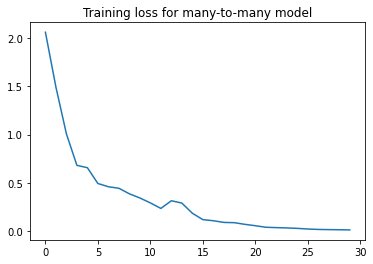

In [ ]:
plt.figure()
plt.plot(tr_loss_hist)
plt.title('Training loss for many-to-many model')
plt.show()

## Summary
 we tried to understand the basic concept of many-to-many RNN model, and how it can used for POS tagging. the output node is more than 2, not one, and measuring the sequence loss. 

{{ 'Reference from stanford CS231n lecture note' | fndetail: 1}}
{{ 'Bring the definition from [wikipedia](https://en.wikipedia.org/wiki/Part_of_speech)' | fndetail: 2}}